In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC  # "Support vector classifier"
plt.style.use('seaborn-v0_8-whitegrid')
from scipy import stats
from ipywidgets import interact, fixed
from sklearn.datasets import make_blobs

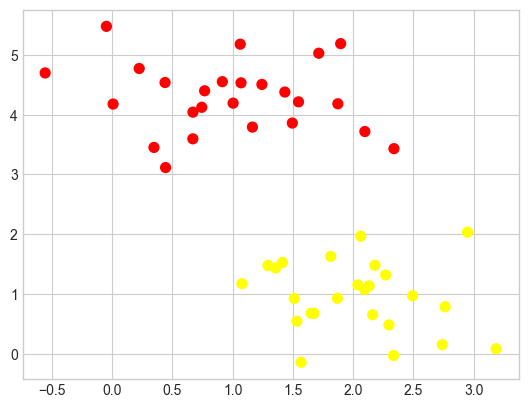

In [15]:
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

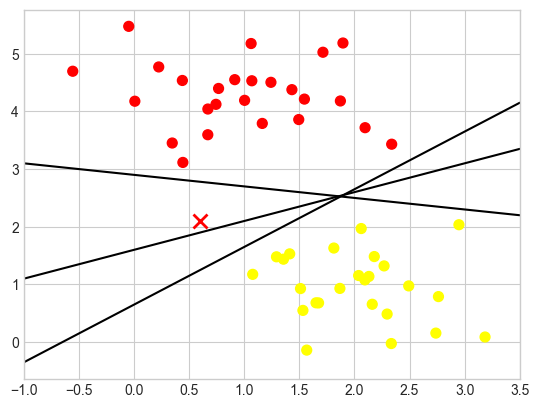

In [16]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)
plt.show()


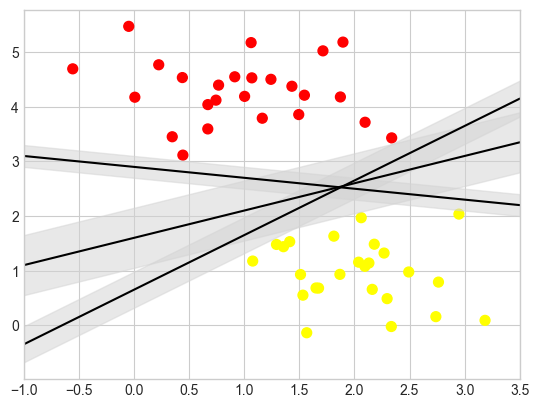

In [17]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='lightgray', alpha=0.5)

plt.xlim(-1, 3.5)
plt.show()


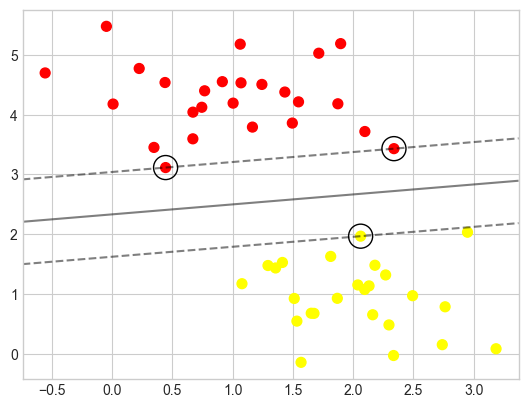

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [18]:
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, edgecolors='black',
                   facecolors='none')

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.show()

model.support_vectors_


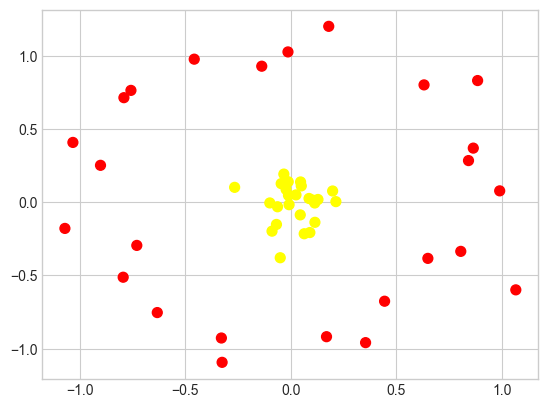

In [19]:
from sklearn.datasets import make_circles
from mpl_toolkits import mplot3d

X, y = make_circles(50, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

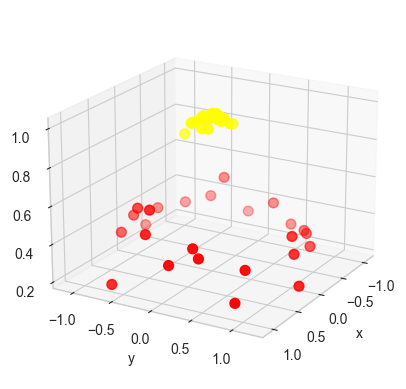

In [20]:
r = np.exp(-(X ** 2).sum(1))
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
ax.view_init(elev=20, azim=30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r');
plt.show()

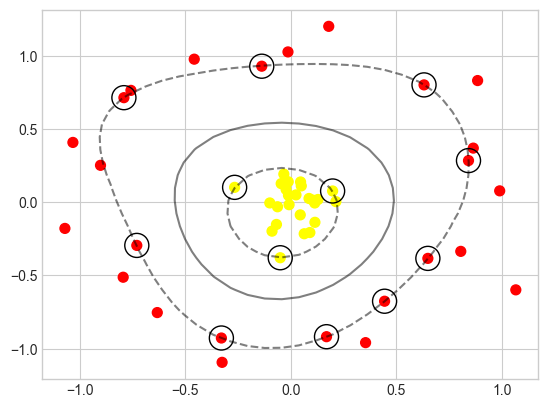

array([[-0.79174129,  0.71403428],
       [-0.73058023, -0.29517878],
       [ 0.44442494, -0.6764797 ],
       [ 0.63151674,  0.80137683],
       [-0.13805488,  0.92899549],
       [ 0.16904367, -0.91879662],
       [-0.32947991, -0.92778441],
       [ 0.84237204,  0.28431819],
       [ 0.64970621, -0.3837491 ],
       [-0.26665698,  0.10149699],
       [-0.05040387, -0.37946864],
       [ 0.19799957,  0.07657689]])

In [21]:
model = SVC(kernel='rbf', C=1E6)
model.fit(X, y)

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, edgecolors='black',
                   facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.show()
model.support_vectors_

# Thuật toán tự viết

In [22]:
!pip install ucimlrepo

In [77]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
banknote_authentication = fetch_ucirepo(id=267) 
  
# data (as pandas dataframes) 
X = banknote_authentication.data.features 
y = banknote_authentication.data.targets 

print(X.head(), X.shape)
print(y.head(), y.shape)

   variance  skewness  curtosis  entropy
0   3.62160    8.6661   -2.8073 -0.44699
1   4.54590    8.1674   -2.4586 -1.46210
2   3.86600   -2.6383    1.9242  0.10645
3   3.45660    9.5228   -4.0112 -3.59440
4   0.32924   -4.4552    4.5718 -0.98880 (1372, 4)
   class
0      0
1      0
2      0
3      0
4      0 (1372, 1)


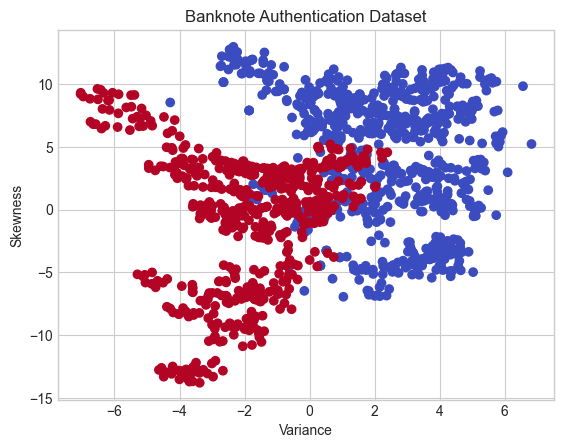

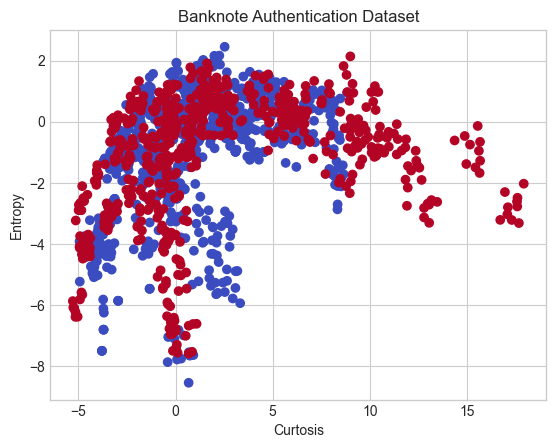

In [24]:
# Plot the data
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y['class'], cmap='coolwarm')
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.title('Banknote Authentication Dataset')
plt.show()

plt.scatter(X.iloc[:, 2], X.iloc[:, 3], c=y['class'], cmap='coolwarm')
plt.xlabel('Curtosis')
plt.ylabel('Entropy')
plt.title('Banknote Authentication Dataset')
plt.show()

In [83]:
X = X.values
y = y['class'].values
print(X, y)

[[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]] [0 0 0 ... 1 1 1]


In [90]:
Lagrange = np.zeros((X.shape[0], 1))
Lagrange[0:4] = 65.5261
print(Lagrange)

[[65.5261]
 [65.5261]
 [65.5261]
 ...
 [ 0.    ]
 [ 0.    ]
 [ 0.    ]]


In [91]:
W = []
for i in range(4):
    W.append(np.sum(Lagrange[i] * y * X[:, i]))
print(np.array(W))

[-74683.37007019 -39714.15278348  85868.37078143 -49829.37876982]


In [93]:
b = []
for i in range(4):
    yi = y[i]
    xi = X[i, :4]
    bi = yi - np.dot(W, xi)
    b.append(bi)
print(b)
bias = np.mean(b)
print(bias)

[np.float64(833425.1557615143), np.float64(802124.9451497591), np.float64(24024.477715124085), np.float64(801668.9609394006)]
615310.8848914495


In [96]:
print("Siêu phẳng cần tìm là:")
print(f"{W[0]} * x1 + {W[1]} * x2 + {W[2]} * x3 + {W[3]} * x4 + {bias} = 0")

Siêu phẳng cần tìm là:
-74683.37007019213 * x1 + -39714.1527834796 * x2 + 85868.37078143194 * x3 + -49829.3787698155 * x4 + 615310.8848914495 = 0


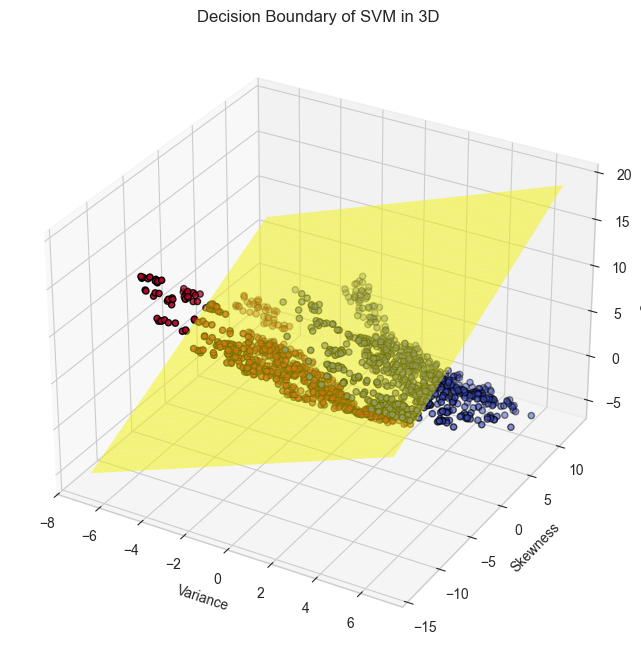

In [100]:
# Vẽ siêu phẳng trong không gian 3D
x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='coolwarm', edgecolors='k')
X1, X2 = np.meshgrid(x1, x2)
Z = (bias - W[0] * X1 - W[1] * X2) / W[2]
ax.plot_surface(X1, X2, Z, alpha=0.5, color='yellow')
ax.set_xlabel('Variance')
ax.set_ylabel('Skewness')
ax.set_zlabel('Curtosis')
ax.set_title('Decision Boundary of SVM in 3D')
plt.show()